# 1. Data Exploration

In [2]:
# !pip install keras
# !pip install tensorflow

import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 1.1 Dimensionality

### 1) What is the type of the training and testing datasets?
The training and testing datasets are both of type **numpy.ndarray**. Specifically, the training dataset consists of two parts:
· **Images (x_train)**: A 3D array of shape (60000, 28, 28), where each image has pixel values ranging from 0 to 255, representing shades from white to black.
· **Labels (y_train)**: A 1D array of shape (60000,), where each label is an integer from 0 to 9, corresponding to the digit shown in the image.
The testing dataset has the same structure, but it contains 10,000 samples instead of 60,000.

In [3]:
print("Training data type:", type(x_train))
print("Training label type:", type(y_train))
print("Testing data type:", type(x_test))
print("Testing label type:", type(y_test))


Training data type: <class 'numpy.ndarray'>
Training label type: <class 'numpy.ndarray'>
Testing data type: <class 'numpy.ndarray'>
Testing label type: <class 'numpy.ndarray'>


### 2) How many features are in the training dataset? The testing dataset? How many samples are in each dataset?
Training samples: 60,000
Testing samples: 10,000
Number of features: Each image is a (28, 28) array, resulting in 28 × 28 = 784 features per image. Each feature corresponds to a pixel value representing the grayscale intensity.

In [4]:
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)
print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])
print("Feature size (image dimension):", x_train.shape[1:])


Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Feature size (image dimension): (28, 28)


### 3) If an array has a shape of (100, 28, 28), what does each number represent in the context of image data, and how would it change if you flattened it to a 2D array?
100: Number of images
28: Height of each image
28: Width of each image

If flattened to a 2D array, it will change to a (100, 784) array, where each image contains a row of 784 features.

In [5]:
flattened_shape = (100, 28 * 28)
print("Flattened shape:", flattened_shape)


Flattened shape: (100, 784)


### 4) How would you convert a 3D array into a 2D array without changing the total number of elements? Describe how flatten() and reshape() can be used for this purpose.
Using the training dataset, the codes of flatten() and reshape() are as follows:

In [6]:
# use "reshape"
x_train_flat = x_train.reshape(x_train.shape[0], -1)
print("Flattened shape:", x_train_flat.shape)

Flattened shape: (60000, 784)


In [7]:
# use "flatten"
x_train_flat = np.array([img.flatten() for img in x_train])
print("Flattened shape:", x_train_flat.shape)

Flattened shape: (60000, 784)


### 5) Why Reshape Data for Neural Networks?
The shape of input data is expected by neural networks, which is specified by the network’s architecture. To match this expected shape, the input data must be reshaped. This is required because the network makes assumptions about the data it will receive as input, which are built into the network’s architecture. If the input data does not conform to the expected shape, the network will be unable to process it properly and may produce incorrect results.

The input data is reshaped so that it can be formatted in a way that the network can understand and use for training. This usually entails rearranging the data into a rectangular grid with a fixed number of rows and columns. The precise shape will be determined by the network’s architecture and the nature of the input data.

In general, reshaping input data is an important step in preparing data for use with a neural network. It helps to ensure that the network can make use of the data and learn from it effectively.

Source: [Reshaping the Dataset For Neural Networks](https://medium.com/@jwbtmf/reshaping-the-dataset-for-neural-network-15ee7bcea25e)

## 1.2 Visualization
Select one random example from each category in the testing set, display each 2D image, and label it with the corresponding category name.

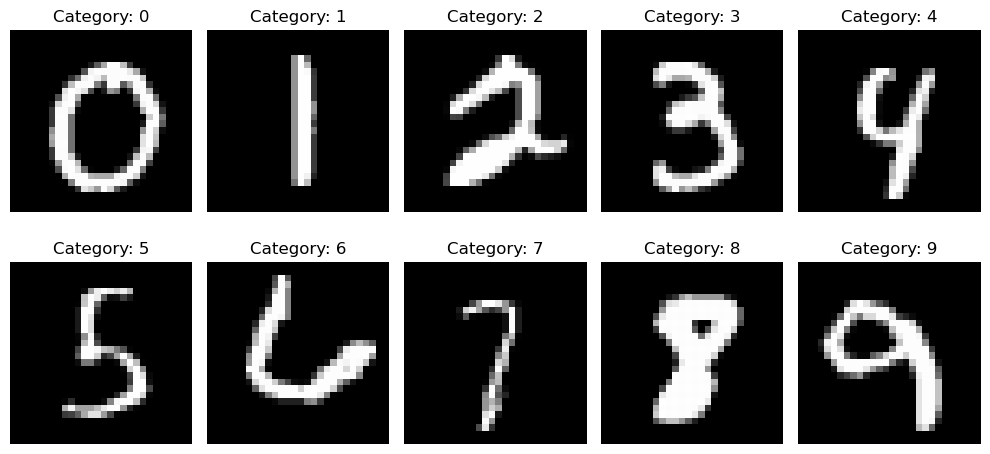

In [8]:
# Unique categories in the dataset
unique_categories = np.unique(y_test)

# Plot one random example from each category
plt.figure(figsize=(10, 5))
for i, category in enumerate(unique_categories):
    # Find all indices of this category
    indices = np.where(y_test == category)[0]
    # Select a random index
    random_index = np.random.choice(indices)
    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[random_index], cmap='gray')
    plt.title(f"Category: {category}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# 2. Data Processing

## 2.1 Subsetting

### 1) Random 10% subset

In [12]:
# split data randomly
x_train_random, _, y_train_random, _ = train_test_split(
    x_train, y_train, test_size=0.9, random_state=42, stratify=y_train)
x_test_random, _, y_test_random, _ = train_test_split(
    x_test, y_test, test_size=0.9, random_state=42, stratify=y_test)

Text(0.5, 1.0, 'Original Training Set Distribution')

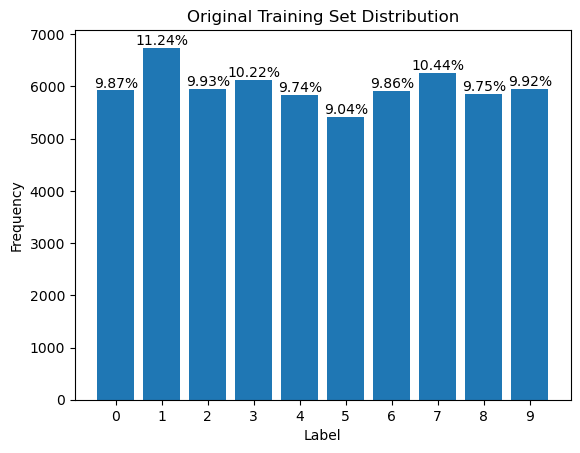

In [22]:
# plot distributions
# initial training dataset
label, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
for i, count in enumerate(counts):
    plt.text(unique[i], count, f'{count/len(y_train)*100:.2f}%', ha='center', va='bottom')
plt.title('Original Training Set Distribution')

Text(0.5, 1.0, 'Reduced 10% Training Set Distribution \n (Randomly splited)')

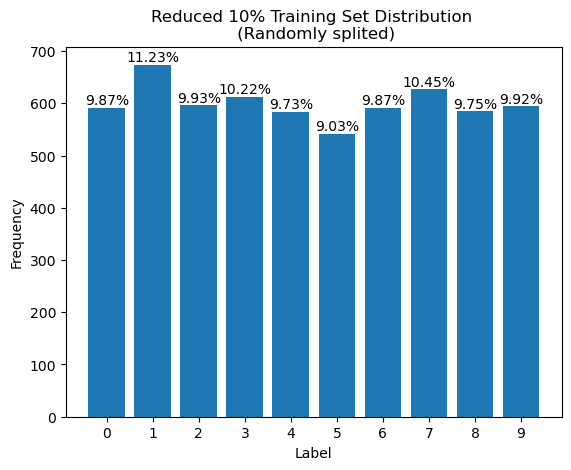

In [26]:
# plot distributions
# reduced training dataset
label, counts = np.unique(y_train_random, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
for i, count in enumerate(counts):
    plt.text(unique[i], count, f'{count/len(y_train_random)*100:.2f}%', ha='center', va='bottom')
plt.title('Reduced 10% Training Set Distribution \n (Randomly splited)')

### 2) First 10% subset

In [24]:
x_train_first, y_train_first = x_train[:int(0.1 * len(x_train))], y_train[:int(0.1 * len(y_train))]
x_test_first, y_test_first = x_test[:int(0.1 * len(x_test))], y_test[:int(0.1 * len(y_test))]

Text(0.5, 1.0, 'Reduced 10% Training Set Distribution \n (first 10% subset)')

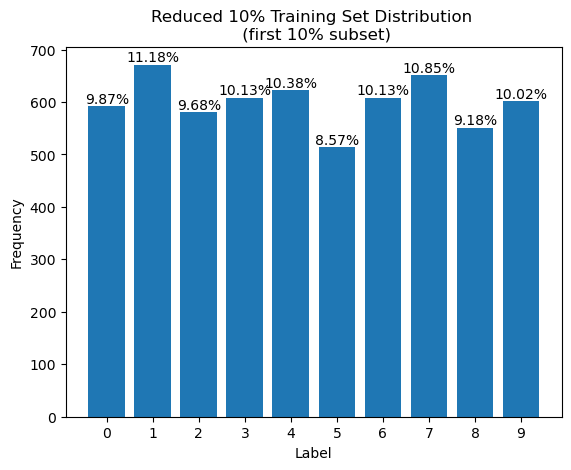

In [27]:
# plot distributions
# reduced training dataset
label, counts = np.unique(y_train_first, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
for i, count in enumerate(counts):
    plt.text(unique[i], count, f'{count/len(y_train_first)*100:.2f}%', ha='center', va='bottom')
plt.title('Reduced 10% Training Set Distribution \n (first 10% subset)')

### 3) When reducing dataset size, what differences might you expect to see in results between randomly selecting samples versus selecting the first portion of the dataset? Is this borne out by the subsets you just created? How does the distribution of the labels in the various subsampled datasets compare to the distribution of the full datasets?

When creating subsets, random sampling is expected to produce a distribution more similar to the original dataset compared to selecting the first 10% of samples. This is because the original dataset may be ordered based on certain patterns, such as sorting by label. In such cases, selecting the first 10% may result in samples concentrated in only a few labels, causing a significant deviation from the original distribution and making the subset less representative. In contrast, random sampling helps prevent this issue, ensuring a more representative subset.

The subsets I created confirm this point. As shown in the bar charts above:
· The randomly sampled subset closely matches the distribution of the original dataset, with a maximum label distribution error of no more than 0.01%.
· The first 10% subset shows a more significant deviation in label distribution. For example: Labels 5 and 8 are noticeably underrepresented, while Labels 4 and 7 are noticeably overrepresented.

### 4) Why might subsampling a dataset be beneficial when developing machine learning models? Discuss the trade-offs.
Pros:Subsampling a dataset will lead to faster training, which is valuable for large dataset.
Cons:If the dataset isn't splitted randomly, it can lead to bias and loss of information. Important patterns, especially from underrepresented classes, might be excluded.

## 2.2 Feature Engineering

### 1) What are the features versus the output in this assignment? Why is it important to distinguish between features (inputs) and outputs (labels) in a machine learning model?

The features (inputs) are the pixel values of the MNIST images, while the output is the labels (0-9) of each image. 
Distinguishing inputs from outputs is crucial because it is the basic of machine learning. The model learns patterns from the features to predict the outputs. So if we don't seperate the inputs and outputs, it will be impossible to make the correct prediction.

### 2) Select all train images labeled "3". Create a single, pixel-wise average image of all of these images. Plot the 2D mean and standard deviation images for category 3 in both the training and testing sets. Comment on the differences between the mean and standard deviation images between the training and testing datasets. 

The two mean images look similar, with no noticeable difference.
The SD images represent pixel-wise variability. Brighter areas show higher variation, meaning different samples vary more in those regions. The training set has more uniform brightness, suggesting consistent patterns. In contrast, the testing set shows more variability around the digit’s curves, indicating that the digit "3" appears in more diverse styles compared to the training set.

### 3) Binarize both of the images from the previous question by setting pixel values equal to 1 if they are greater than the mean value for that pixel and equal to 0 if they are less than the mean value for that pixel.Plot the 2D mean and standard deviation images for category "3" in the training and testing sets for the binarized images.


In [52]:
def plot_mean_std(label):
    train_3 = x_train[y_train == label]
    test_3 = x_test[y_test == label]
    
    mean_train_3 = train_3.mean(axis=0)
    mean_test_3 = test_3.mean(axis=0)
    
    sd_train_3 = train_3.std(axis=0)
    sd_test_3 = test_3.std(axis=0)

    plt.figure(figsize=(8,8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(mean_train_3, cmap='gray')
    plt.title(f'Mean of {label} in Training Set')
    
    plt.subplot(2, 2, 2)
    plt.imshow(mean_test_3, cmap='gray')
    plt.title(f'Mean of {label} in Testing Set')
    
    
    plt.subplot(2, 2, 3)
    plt.imshow(sd_train_3, cmap='gray')
    plt.title(f'SD of {label} in Training Set')
    
    plt.subplot(2, 2, 4)
    plt.imshow(sd_test_3, cmap='gray')
    plt.title(f'SD of {label} in Testing Set')
    plt.show()

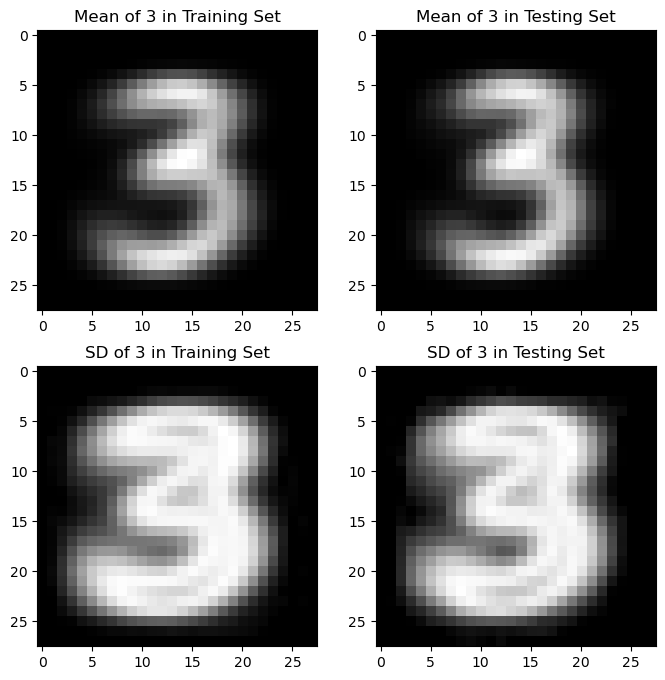

In [46]:
plot_mean_std(3)

In [48]:
def plot_binary(label):
    train_3 = x_train[y_train == label]
    test_3 = x_test[y_test == label]
    
    mean_train_3 = train_3.mean(axis=0)
    mean_test_3 = test_3.mean(axis=0)
    
    train_3_binary = np.where(train_3 > mean_train_3, 1, 0)
    test_3_binary = np.where(test_3 > mean_test_3, 1, 0)
    
    mean_train_3_binary = train_3_binary.mean(axis=0)
    mean_test_3_binary = test_3_binary.mean(axis=0)
    
    sd_train_3_binary =train_3_binary.std(axis=0)
    sd_test_3_binary = test_3_binary.std(axis=0)
    
    plt.figure(figsize=(8, 8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(mean_train_3_binary, cmap='gray')
    plt.title(f'Mean of {label} Binary in Training Set')
    
    plt.subplot(2, 2, 2)
    plt.imshow(mean_test_3_binary, cmap='gray')
    plt.title(f'Mean of {label} Binary in Testing Set')
    
    
    plt.subplot(2, 2, 3)
    plt.imshow(sd_train_3_binary, cmap='gray')
    plt.title(f'SD of {label} Binary in Training Set')
    
    plt.subplot(2, 2, 4)
    plt.imshow(sd_test_3_binary, cmap='gray')
    plt.title(f'SD of {label} Binary in Testing Set')
    plt.show()

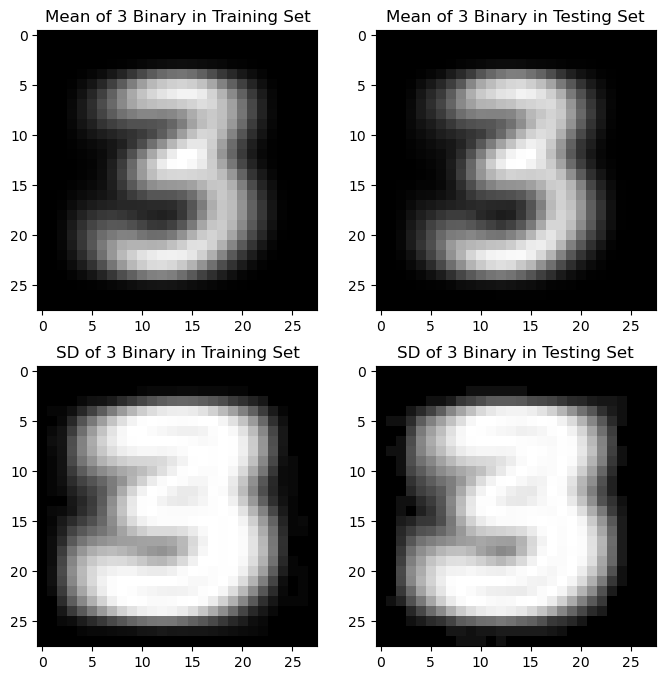

In [49]:
plot_binary(3)

### 4) Now repeat this for a new label (e.g., "7"). Comment on the differences between the mean and standard deviation images between the training and testing datasets for the binarized images.

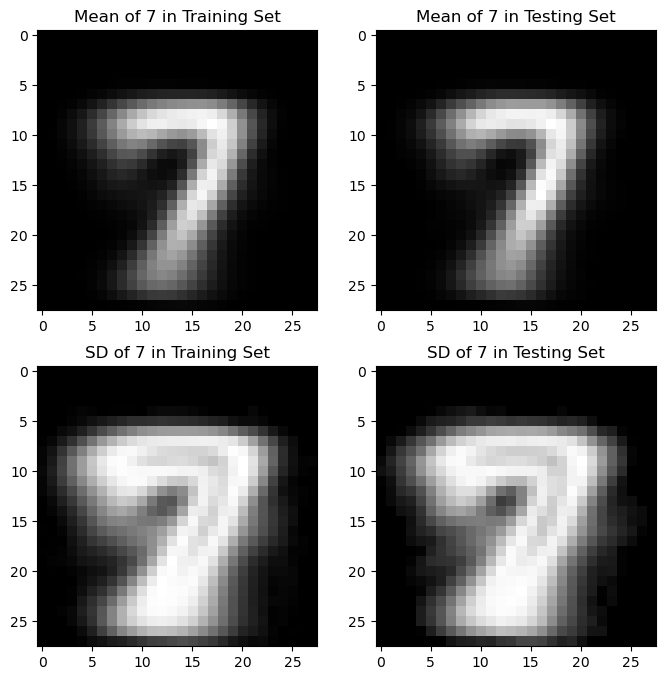

In [50]:
plot_mean_std(7)

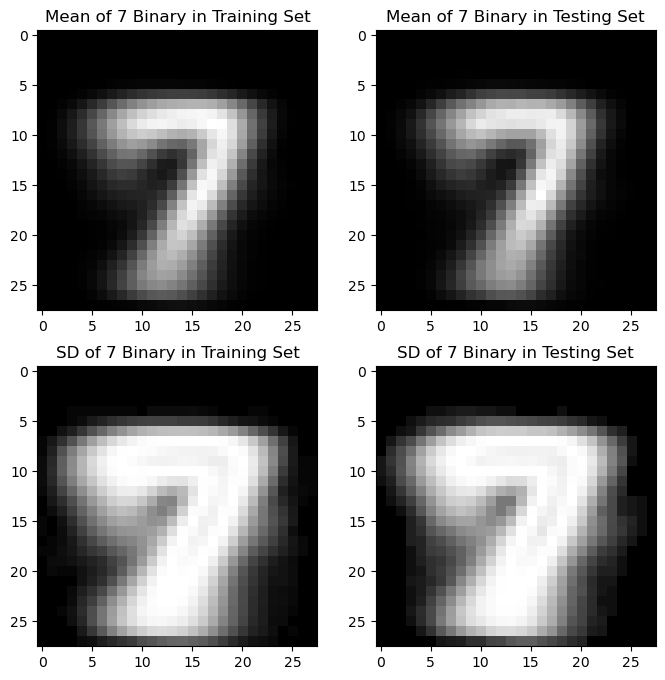

In [51]:
plot_binary(7)

Both mean images display a clear outline of "7", but the testing set appears slightly blurrier, indicating more variation in how the digit is written.
The SD image of testing set seems brighter, suggesting the digit "7" appears in more diverse styles compared to the training set.

### 5) In plain English, what are we actually doing when we binarize an image? How does the new pixel value relate to the pixel value of the original image and the mean value for that pixel across all images with that label?

The original images contain 256 different shades of gray, ranging from 0 (white) to 255 (black). Through binarization, we convert these grayscale images into black-and-white images with only two possible values.

In this assignment, using label 3 as an example, we first calculate the pixel-wise mean value across all images labeled "3". Then, for each image with label 3, we set the pixel value to 1 if it is greater than the mean and to 0 if it is less than the mean, thereby obtaining the binarized images.

### 6) What is the index of the most dissimilar image in category "3" in the training set for the regular images? What about the most similar image? Does this change for the binarized images? If so, why? Make sure to plot all four images with approproate labels.

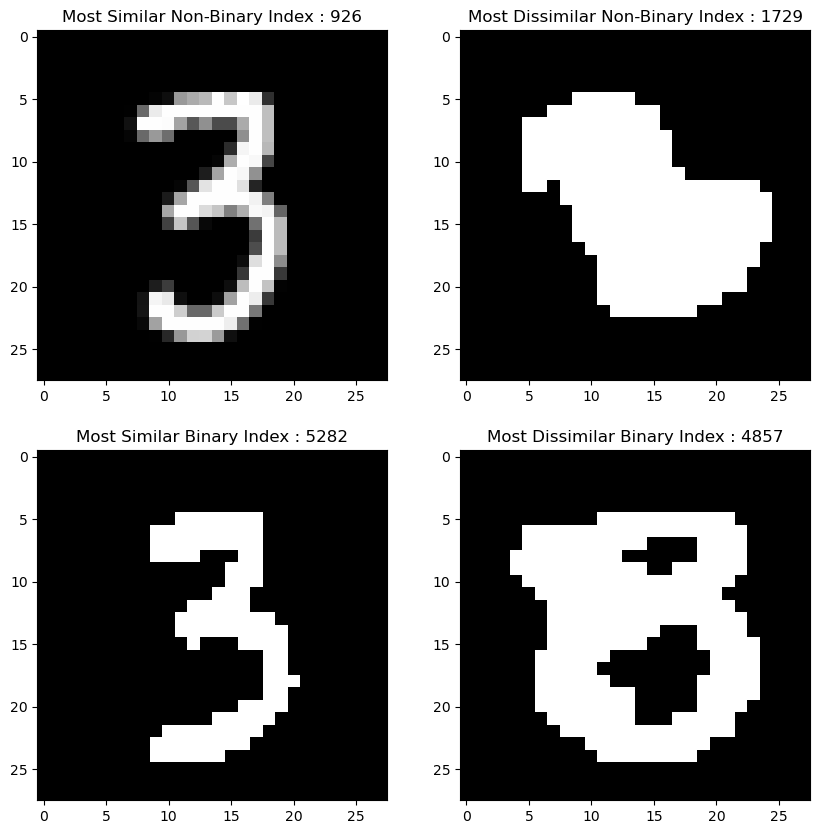

In [56]:
from scipy.spatial.distance import euclidean

train_3 = x_train[y_train == 3]
mean_train_3 = train_3.mean(axis=0)
train_3_binary = np.where(train_3 > mean_train_3, 1, 0)
mean_train_3_binary = train_3_binary.mean(axis=0)

Eudistance_mean_gray = [euclidean(mean_train_3.flatten(), img.flatten()) for img in train_3]
similar_index_gray = np.argmin(Eudistance_mean_gray)
dissimilar_index_gray = np.argmax(Eudistance_mean_gray)

Eudistance_mean_binary = [euclidean(mean_train_3_binary.flatten(), img.flatten()) for img in train_3_binary]
similar_index_binary = np.argmin(Eudistance_mean_binary)
dissimilar_index_binary = np.argmax(Eudistance_mean_binary)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(train_3[similar_index_gray], cmap='gray')
plt.title('Most Similar Non-Binary Index : ' + str(similar_index_gray))

plt.subplot(2, 2, 2)
plt.imshow(train_3[dissimilar_index_gray], cmap='gray')
plt.title('Most Dissimilar Non-Binary Index : ' + str(dissimilar_index_gray))

plt.subplot(2, 2, 3)
plt.imshow(train_3_binary[similar_index_binary], cmap='gray')
plt.title('Most Similar Binary Index : ' + str(similar_index_binary))

plt.subplot(2, 2, 4)
plt.imshow(train_3_binary[dissimilar_index_binary], cmap='gray')
plt.title('Most Dissimilar Binary Index : ' + str(dissimilar_index_binary))

plt.show()

Both indices are affected because the binarized image has pixel values between 0 and 1, while the non-binary image has values ranging from 0 to 255. Consequently, the mean pixel values differ between the two sets, leading to varying distance values for each index.

### 7) What do you think the effect of binarizing these images is from a machine learning perspective? How does binarization of images (converting pixel values to 0 or 1 based on a threshold) affect the representation of features, and what might be the benefits and limitations of this approach?
Binarizing images reduces pixel values to 0 or 1 based on a threshold, losing detailed intensity information but highlighting structural features like edges and shapes. This simplifies the model, making it faster and more memory-efficient. It can improve performance in tasks like digit recognition, where structure is key.

However, it also comes with drawbacks: loss of precision, over-simplification of complex features, and sensitivity to the chosen threshold. While useful for some tasks, binarization may not be ideal for problems requiring nuanced details.

### 8)How does what you've just done relate to the idea of standardizing data? Why might it be important to standardize our data before using it to train a model?
I've binarized the image. But binarizing the image is not the same as standardizing data. Standardization scales data to have a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to the model. Binarization reduces pixel values to two levels, but it doesn't address scale differences like standardization does.

**Why Standardization is Important:**
1. It ensures features contribute equally, especially for distance-based algorithms.
2. It helps models converge faster by avoiding bias from larger numerical ranges.
3. It prevents scale-related model bias.

Standardization improves model performance and training efficiency by ensuring features are on a similar scale.

### 9) Describe how calculating a pixel-wise mean or standard deviation for a set of images can help you understand variations within a category. What does a high standard deviation indicate in this context?
**Pixel-wise Mean:** Shows the average pattern for a category.  
**Pixel-wise Standard Deviation:** Highlights areas with the most variation.  

High Standard Deviation indicates variability, such as differences in handwriting styles for digits. While low Standard Deviation:** Shows consistent features, like backgrounds or common strokes. This helps identify key distinguishing features and guide model interpretation.

# 3. Model Training, Validation, and Intepretation

## 3.1 Support Vector Machine
From the training dataset, select only images from categories "3" and "9".Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9. Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2. What is the prediction accuracy using the model trained on the training set? What is the prediction accuracy using the model trained on the testing set?

In [60]:
indices = np.where((y_train == 3) | (y_train == 9)) 
x_filtered = x_train[indices] 
y_filtered = y_train[indices]  

y_filtered = np.where(y_filtered == 3, 0, 1)

x_set1, x_set2, y_set1, y_set2 = train_test_split(x_filtered, y_filtered, test_size=0.4, random_state=42)

svm = SVC(kernel='linear')
svm.fit(x_set1.reshape(x_set1.shape[0], -1), y_set1)  

y_pred1 = svm.predict(x_set1.reshape(x_set1.shape[0], -1))
y_pred2 = svm.predict(x_set2.reshape(x_set2.shape[0], -1))

accuracy_set1 = accuracy_score(y_set1, y_pred1)
accuracy_set2 = accuracy_score(y_set2, y_pred2)

print('Prediction Accuracy on Train Set:',accuracy_set1)
print('Prediction Accuracy on Test Set:',accuracy_set2)

Prediction Accuracy on Train Set: 1.0
Prediction Accuracy on Test Set: 0.9743377483443708


## 3.2 Modeling with Engineered Data
We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:

Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.
For each image row i, find n_i, the sum of 1's in the row (28 features).
For each image column j, find n_j, the sum of 1's in the column (28 features).
Concatenate these features to form a feature vector of 56 features.
**What is the prediction accuracy using an SVM model trained on the training set? What is the prediction accuracy using an SVM model trained on the testing set? How about the prediction accuracy of a KNN model trained on the training set? And on the testing set? What does this tell you about the potential impacts of feature engineering?**

In [64]:
def extract_features(images):
    # Binarize images
    images = (images > 128).astype(int)
    
    row_sums = images.sum(axis=1)  
    col_sums = images.sum(axis=2)  
    features = np.hstack([row_sums, col_sums])  
    return features

train_indices = np.where((y_train == 3) | (y_train == 9))
x_train_filtered = x_train[train_indices]
y_train_filtered = y_train[train_indices]
y_train_filtered = np.where(y_train_filtered == 3, 0, 1)

test_indices = np.where((y_test == 3) | (y_test == 9))
x_test_filtered = x_test[test_indices]
y_test_filtered = y_test[test_indices]
y_test_filtered = np.where(y_test_filtered == 3, 0, 1)

x_train_features = extract_features(x_train_filtered)
x_test_features = extract_features(x_test_filtered)

svm = SVC(kernel='linear')
svm.fit(x_train_features, y_train_filtered)
svm_train_acc = accuracy_score(y_train_filtered, svm.predict(x_train_features))
svm_test_acc = accuracy_score(y_test_filtered, svm.predict(x_test_features))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_features, y_train_filtered)
knn_train_acc = accuracy_score(y_train_filtered, knn.predict(x_train_features))
knn_test_acc = accuracy_score(y_test_filtered, knn.predict(x_test_features))

print('prediction accuracy using an SVM model trained on the training set:', svm_train_acc)
print('prediction accuracy using an SVM model trained on the testing set:', svm_test_acc)
print('prediction accuracy of a KNN model trained on the training set:', knn_train_acc)
print('prediction accuracy of a KNN model trained on the testing set:', knn_test_acc)


prediction accuracy using an SVM model trained on the training set: 0.9677152317880795
prediction accuracy using an SVM model trained on the testing set: 0.9653293709757306
prediction accuracy of a KNN model trained on the training set: 0.9800496688741722
prediction accuracy of a KNN model trained on the testing set: 0.9673105497771174


Compared to the SVM accuracy without feature engineering (97.4%), the prediction accuracy decreased by approximately 1% after feature engineering (96.5%). This suggests that the feature engineering process may not have improved the model's performance and could have introduced irrelevant or noisy features. Specifically, by simplifying the image data, important details may have been lost. While dimensionality reduction can be helpful, it might have reduced the model's ability to capture more complex patterns in the images.

## 3.3 K-Nearest Neighbors
In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9. Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.

For k = 4, what is the label that was predicted with lowest accuracy?

For k = 20, what is the label that was predicted with lowest accuracy?

What is the label pair that was confused most often (i.e., class A is labeled as B, and vice versa)?

Visualize 5 mislabeled samples with their actual and predicted labels (k=8).

Based on the patterns in the pixel values for each category, which labels (numbers) do you think the model might struggle to identify or distinguish from one another? Explain why certain labels might be more challenging to separate, considering the similarity in pixel patterns or shapes.

k = 4: Lowest accuracy for label 9
k = 4: Most confused pair (7, 1)
k = 8: Lowest accuracy for label 7
k = 8: Most confused pair (7, 1)
k = 12: Lowest accuracy for label 7
k = 12: Most confused pair (7, 1)
k = 16: Lowest accuracy for label 7
k = 16: Most confused pair (7, 1)
k = 20: Lowest accuracy for label 7
k = 20: Most confused pair (7, 1)
k = 24: Lowest accuracy for label 7
k = 24: Most confused pair (7, 1)
k = 28: Lowest accuracy for label 7
k = 28: Most confused pair (7, 1)
k = 32: Lowest accuracy for label 7
k = 32: Most confused pair (7, 1)
k = 36: Lowest accuracy for label 7
k = 36: Most confused pair (7, 1)
k = 40: Lowest accuracy for label 7
k = 40: Most confused pair (7, 1)


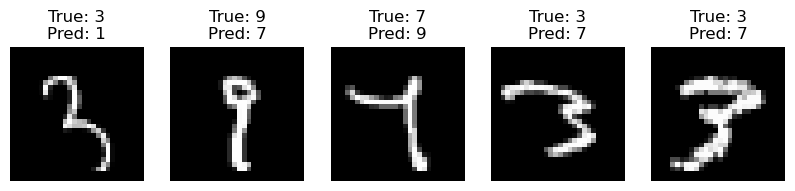

In [65]:
# Filter digits 1, 3, 5, 7, and 9 from training and testing sets
selected_digits = [1, 3, 5, 7, 9]

# Select only the images and labels for the chosen digits
train_indices = np.where(np.isin(y_train, selected_digits))
test_indices = np.where(np.isin(y_test, selected_digits))

x_train_filtered, y_train_filtered = x_train[train_indices], y_train[train_indices]
x_test_filtered, y_test_filtered = x_test[test_indices], y_test[test_indices]

# Normalize and reshape data for k-NN (flatten 28x28 images to 1D vectors)
x_train_flattened = x_train_filtered.reshape(x_train_filtered.shape[0], -1)
x_test_flattened = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

# Initialize storage for accuracy results
k_values = list(range(4, 41, 4))
accuracies = {}

for k in k_values:
    # Train k-NN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flattened, y_train_filtered)

    # Predict on test data
    y_pred = knn.predict(x_test_flattened)

    # Compute overall accuracy
    accuracies[k] = accuracy_score(y_test_filtered, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test_filtered, y_pred, labels=selected_digits)

    # Find the label with lowest accuracy
    label_accuracies = cm.diagonal() / cm.sum(axis=1)
    lowest_accuracy_label = selected_digits[np.argmin(label_accuracies)]

    print(f"k = {k}: Lowest accuracy for label {lowest_accuracy_label}")

    # Identify the most confused pair (largest off-diagonal value in confusion matrix)
    cm_no_diag = cm.copy()
    np.fill_diagonal(cm_no_diag, 0)
    most_confused_pair = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)
    most_confused_labels = (selected_digits[most_confused_pair[0]], selected_digits[most_confused_pair[1]])

    print(f"k = {k}: Most confused pair {most_confused_labels}")

# Select k=20 for error visualization
knn_best = KNeighborsClassifier(n_neighbors=8)
knn_best.fit(x_train_flattened, y_train_filtered)
y_pred_best = knn_best.predict(x_test_flattened)

# Find misclassified samples
misclassified_indices = np.where(y_pred_best != y_test_filtered)[0]

# Visualize 5 mislabeled samples
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test_filtered[idx], cmap="gray")
    plt.title(f"True: {y_test_filtered[idx]}\nPred: {y_pred_best[idx]}")
    plt.axis("off")

plt.show()


The model has difficulty distinguishing labels with similar structural characteristics, such as 1 and 7, or 7 and 9. These labels are hard to distinguish because they often appear quite similar when written or drawn with slight differences.

## 3.4 Comprehension Questions
Why is it important to have separate training and testing datasets? What potential issues arise if you use the same data for both training and evaluation?

If you achieve a high accuracy on the training set but a lower accuracy on the testing set, what might this indicate about your model’s performance and generalization?

**1. Importance of Separating Training and Testing Datasets**
**Prevents Overfitting**: The model could memorize patterns from the training data without learning generalizable features.
**Evaluates Generalization**: Testing on unseen data helps measure how well the model performs on new inputs.

**2. Issues if Using the Same Data for Training and Evaluation**
**Overfitting Bias**: The model may appear to perform well because it has seen the answers.
**Misleading Metrics**: Accuracy and error rates will be artificially high, giving a false sense of performance.

**3. Interpreting High Training Accuracy but Low Testing Accuracy**
**Overfitting**: The model has learned patterns too specific to the training data, including noise or outliers.
**Lack of Generalization**: The model fails to adapt to new patterns in the test set.
**Solution**: Use techniques like cross-validation, regularization, and early stopping to improve generalization.

> The code debugging and text refinement in this project were assisted by ChatGPT, which provided valuable suggestions that greatly enhanced my work efficiency.
>
> Source: OpenAI ChatGPT, accessed on February 15, 2025.
